In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import platform
print 'python '+ platform.python_version()
print 'numpy version '  + np.__version__
print 'scipy version ' + sp.__version__

python 2.7.9
numpy version 1.10.4
scipy version 0.17.0


In [10]:
beforePoints = np.array([
    [22,39,11],
    [36,32,10],
    [13,30,5],
    [20,26,10],
    [20,26,15],
    [28,21,15],
    [10,17,10],
    [2,7,22]])*1.0

In [12]:
beforeValues = np.array([
    0.215,
    0.916,
    89.9,
    0.240,
    2.68,
    0.294,
    2.33,
    0.0749])

In [16]:
afterPoints = np.array([
    [9,11,3],
    [9,11,6],
    [9,11,10],
    [17,27,3],
    [17,27,10],
    [17,27,13],
    [28,24,5],
    [28,24,10],
    [29,2,7],
    [29,2,10],
    [29,2,13],
    [23,13,7],
    [23,13,10],
    [23,13,13]])*1.0

In [17]:
afterValues= np.array([
    0.0881,
    0.0827,
    0.0867,
    0.242,
    0.094,
    0.0873,
    0.0892,
    0.0802,
    0.0821,
    0.0912,
    0.0887,
    0.0858,
    0.0838,
    0.0855])

(0, 40)

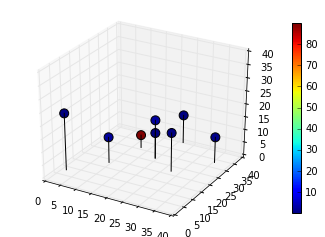

In [53]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(beforePoints[:,0], beforePoints[:,1], zs=beforePoints[:,2], zdir='z', s=80, c=beforeValues,depthshade=False)
for i in range(0,len(beforePoints[:,0])):
    ax.plot([beforePoints[i,0],beforePoints[i,0]],[beforePoints[i,1],beforePoints[i,1]], zs=[0,beforePoints[i,2]], c='k')

fig.colorbar(scat, shrink=0.85)
ax.set_xlim3d(0,40)
ax.set_ylim3d(0,40)
ax.set_zlim3d(0,40)


(0, 40)

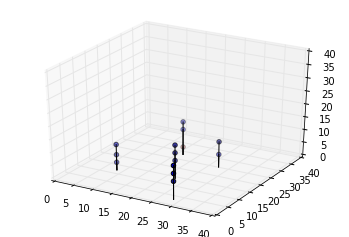

In [58]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(afterPoints[:,0], afterPoints[:,1], zs=afterPoints[:,2], zdir='z', s=20, c=afterValues)
for i in range(0,len(afterPoints[:,0])):
    ax.plot([afterPoints[i,0],afterPoints[i,0]],[afterPoints[i,1],afterPoints[i,1]], zs=[0,afterPoints[i,2]], c='k')

ax.set_xlim3d(0,40)
ax.set_ylim3d(0,40)
ax.set_zlim3d(0,40)

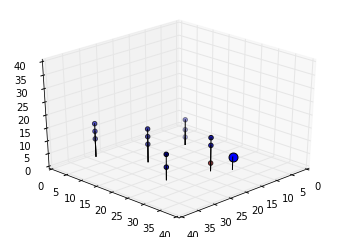

In [59]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(afterPoints[:,0], afterPoints[:,1], zs=afterPoints[:,2], zdir='z', s=20, c=afterValues)
for i in range(0,len(afterPoints[:,0])):
    ax.plot([afterPoints[i,0],afterPoints[i,0]],[afterPoints[i,1],afterPoints[i,1]], zs=[0,afterPoints[i,2]], c='k')

ax.scatter(beforePoints[2,0],beforePoints[2,1], zs=beforePoints[2,2], s=80)
ax.plot([beforePoints[2,0],beforePoints[2,0]],[beforePoints[2,1],beforePoints[2,1]], zs=[0,beforePoints[2,2]], c='k')

ax.set_xlim3d(0,40)
ax.set_ylim3d(0,40)
ax.set_zlim3d(0,40)

ax.view_init(30, 45)
plt.draw()

the big dot is the very high value point from the pretesting, which as you can see from this angle, doesn't have any data points around it

In [29]:
from scipy import interpolate
near = interpolate.griddata(afterPoints, afterValues, beforePoints, method='nearest')
linear = interpolate.griddata(afterPoints, afterValues, beforePoints, method='linear')
print near
print linear

[ 0.094   0.0802  0.242   0.094   0.0873  0.0802  0.0867  0.0867]
[        nan         nan         nan  0.09019706         nan         nan
         nan         nan]


In [31]:
otherWay = interpolate.griddata(beforePoints, beforeValues, afterPoints, method='nearest')

In [34]:
print near/beforeValues
print np.mean(near/beforeValues)

[ 0.4372093   0.08755459  0.00269188  0.39166667  0.03257463  0.27278912
  0.0372103   1.15754339]
0.302404983518


In [39]:
print afterValues/otherWay
print '-----'
print np.mean(afterValues/otherWay)

[ 0.03781116  0.03549356  0.0372103   0.00269188  0.39166667  0.03257463
  0.37166667  0.27278912  0.2792517   0.31020408  0.30170068  0.29183673
  0.28503401  0.29081633]
-----
0.210053393899


In [36]:
print np.mean(afterValues)/np.mean(beforeValues)

0.00808396372593
